In [1]:
%pip install category_encoders==2.5.0
%pip install hyperopt==0.2.7
%pip install lightgbm==3.3.0
%pip install matplotlib==3.5.1
%pip install numpy==1.22.4
%pip install pandas==1.3.0
%pip install scikit_learn==1.1.2
%pip install seaborn==0.12.0
%pip install shap==0.40.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.7 MB 281.8 kB/s eta 0:00:53
   ---------------------------------------- 0.0/14.7 MB 281.8 kB/s eta 0:00:53
   ---------------

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\del\anaconda3\envs\projet_python\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\del\anaconda3\envs\projet_python\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\Users\del\anaconda3\envs\projet_python\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\Users\del\anaconda3\envs\projet_python\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "c:\Users\del\anaconda3\envs\projet_python\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "c:\Users\del\anaconda3\envs\projet_python\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "c:\Users\del\anaconda3\envs\p

   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41
   ------- -------------------------------- 2.8/14.7 MB 9.6 kB/s eta 0:20:41

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
path = os.getcwd()
import sys
sys.path.append("")
from mon_package import *
import pandas as pd
import numpy as np
import category_encoders as ce
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
import bisect
import random
from sklearn.preprocessing import OneHotEncoder
from hyperopt import fmin, tpe, hp, anneal, Trials
import gc
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


# Description des Colonnes
| Colonne            | Description                                                                      |
|--------------------|----------------------------------------------------------------------------------|
| User_id            | identiant de l'utilisateur                                                       |
| employment_type    | Type d'emploi (Salarié, Travailleur indépendant)                                 |
| tier_of_employment | Niveau d'emploi (Selon la performance de l'entreprise)                           |
| industry           | Secteur d'activité de l'employeur                                                |
| role               | Rôle de l'utilisateur dans l'entreprise                                          |
| work_experience    | Expérience professionnelle totale                                                |
| total_income       | Revenu total                                                                     |
| gender             | Genre du client                                                                  |
| married            | Situation matrimoniale                                                           |
| dependents         | Nombre de personnes à charge de l'utilisateur                                    |
| home_type          | Statut du logement (Loué, Propriétaire, etc.)                                    |
| pincode            | Trois chiffres du milieu du code postal                                          |
| has_social_profile | Possède un profil de réseau social                                               |
| is_verified        | Le profil social est-il vérifié ?                                                |
| delinq_2yrs        | Nombre de défauts de paiement de prêt des 2 dernières années                     |
| total_payement     | Montant total payé pour le prêt au cours des 2 dernières années                  |
| received_principal | Montant total du principal remboursé pour le prêt au cours des 2 dernières années|
| interest_received  | Montant total des intérêts perçus sur le prêt au cours des 2 dernières années    |
| number_of_loans    | Nombre de prêts souscrits au cours des 2 dernières années                        |
| emi_1_dpd          | Retard de paiement du 1er EMI (0, 30+, 60+, 90+)                                 |
| emi_2_dpd          | Retard de paiement du 2e EMI (0, 30+, 60+, 90+)                                  |
| emi_3_dpd          | Retard de paiement du 3e EMI (0, 30+, 60+, 90+)                                  |
| emi_4_dpd          | Retard de paiement du 4e EMI (0, 30+, 60+, 90+)                                  |
| emi_5_dpd          | Retard de paiement du 5e EMI (0, 30+, 60+, 90+)                                  |
| emi_6_dpd          | Retard de paiement du 6e EMI (0, 30+, 60+, 90+)                                  |
| max_dpd            | Retard de paiement maximum (0, 30+, 60+, 90+) atteint                            |
| yearmo             | Année et mois de la demande de prêt (format AAAAMM)                              |

## Points d'action:
- Supprimer la colonne Genre (le genre ne peut pas être utilisé comme facteur distinctif pour le risque de crédit).
- Selon l'année et le mois, on divise les données en Entraînement, Validation et Test (Hold Out).
- Analyse du taux de transfert des retards de paiement (DPD Roll Rate Analysis) et analyse des fenêtres de transfert des retards de paiement (Window Roll Rate Analysis) pour définir le label (défaut = retard de paiement DPD X dans les Y premiers mois, définir X et Y).

In [2]:
#Définition des paramètres
data_path = 'data.csv'
#Colonnes non utilisées comme caractéristiques 
id_cols = ['User_id','emi_1_dpd', 'emi_2_dpd', 'emi_3_dpd', 'emi_4_dpd', 'emi_5_dpd', 'emi_6_dpd', 'max_dpd', 'yearmo']
drop_columns = ['gender']

In [3]:
# Lecture des données et supprimer les colonnes inutilisables
df = lire_data(data_path, drop_columns)
print(df.drop(columns = id_cols).shape)
df.head(5)

(143727, 17)


,User_id,employment_type,tier_of_employment,industry,role,work_experience,total_income,married,dependents,home_type,...,interest_received,number_of_loans,emi_1_dpd,emi_2_dpd,emi_3_dpd,emi_4_dpd,emi_5_dpd,emi_6_dpd,max_dpd,yearmo
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.000,Yes,4,rent,...,852.690,0,0,90,90,90,90,90,90,202203
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.000,No,1,mortgage,...,4912.530,0,0,0,0,0,0,0,0,202203
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.000,NaN,3,own,...,3310.680,0,90,90,90,90,90,90,90,202205
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.000,NaN,1,rent,...,1459.760,0,0,0,0,0,0,0,0,202203
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.000,NaN,3,rent,...,1793.000,0,0,0,0,0,0,0,0,202203


In [4]:
# Caractéristiques numériques, catégoriques, nombre de valeurs nulles par caractéristique et caractéristiques à variance nulle.
comprendre_data(df, id_cols)

Colonnes numériques  : ['total_income', 'dependents', 'delinq_2yrs', 'total_payement', 'received_principal', 'interest_received', 'number_of_loans']

Colonnes catégorielles : ['employment_type', 'tier_of_employment', 'industry', 'role', 'work_experience', 'married', 'home_type', 'pincode', 'has_social_profile', 'is_verified']

Valeurs manquantes
employment_type       84642
tier_of_employment    84642
industry                  4
role                      0
work_experience           4
total_income              0
married               48143
dependents                0
home_type                 0
pincode                   0
has_social_profile    47856
is_verified           35803
delinq_2yrs               0
total_payement            0
received_principal        0
interest_received         0
number_of_loans           0
dtype: int64

Colonnes sans variance: Index([], dtype='object')


In [4]:

df.yearmo.value_counts()

202203    28750
202201    28750
202202    28750
202204    28750
202205    28727
Name: yearmo, dtype: int64

Division des données selon la chronologie pour s'assurer que le modèle développé peut bien prédire sur des données hors période.
<br>**Train** - Yearmo 202201 à 202203
<br>**Validation** - Yearmo 202204
<br>**Hold out** - Yearmo 202205 

In [5]:
train, val, hold_out = data_split(df)

#  Analyse du taux de report
## Taux de report des arriérés de paiement (DPD Roll Rate)

In [ ]:
# Pourcentage de clients ayant atteint X DPD
analyse_DPD(train)

,Jours de retard,Nombre des clients,Pourcentage des clients
0,0,86250,100.0 %
1,30,22073,25.59 %
2,60,8099,9.39 %
3,90,7926,9.19 %


<br>- ~25,6 % des clients ont remboursé après avoir dépassé DPD30.
<br>- La plupart des personnes ayant dépassé DPD60 dépassent également DPD90.
<br>**Conclusion** .-. *DPD60 devrait être le bon choix, car le taux de recouvrement est faible après ce seuil.*









## Taux de roulement par fenêtre (Window Roll Rate)

In [9]:
# Pour DPD 60, analyse du pourcentage de clients atteignant DPD60 à différentes étapes du cycle de vie des EMI.
analyse_EMI(train, 60)

,Première mensualité en défaut,Nombres des clients en défaut,Pourcentage des clients
0,1,6546,80.82 %
1,2,1084,13.38 %
2,3,421,5.2 %
3,4,22,0.27 %
4,5,18,0.22 %
5,6,8,0.1 %


<br>- 80,8 % des défauts de paiement surviennent lors de la 1ʳᵉ échéance (EMI), et 5,2 % lors de la 3ᵉ échéance. Après la 3ᵉ échéance, le taux de défaut est faible.
<br>**Conclusion** - La plupart des défauts de paiement se produisent au cours des 3 premières échéances. Nous pouvons donc utiliser DPD60 dans les 3 premiers mois comme  variable cible (label).

## Création de cible 

In [6]:
# indiquer  un client en défaut ou pas
train = ajouter_label(train, dpd = 60, mois = 3)
val = ajouter_label(val, dpd = 60, mois = 3)
hold_out = ajouter_label(hold_out, dpd = 60, mois = 3)

La colonne label a été ajoutée !
La colonne label a été ajoutée !
La colonne label a été ajoutée !


### Distribution de la cible (label)

In [15]:
distribution_label([train, val, hold_out], ['Training', 'Validation', 'Hold Out'], 'label')


la distribution de label Training
   label  count  pourcentage
0      0  78199       90.666
1      1   8051        9.334

la distribution de label Validation
   label  count  pourcentage
0      0  25941       90.230
1      1   2809        9.770

la distribution de label Hold Out
   label  count  pourcentage
0      0  26118       90.918
1      1   2609        9.082


- Les labels sont déséquilibrés en faveur de la classe 0
- Le même niveau de déséquilibre se retrouve dans les ensembles d'entraînement, de validation et de test (Hold Out).

# Création des nouvelles variables

In [7]:
# Nous ajoutons des caractéristiques :
#% du montant payé en tant qu'intérêt lors du remboursement des prêts précédents
#% de prêts en défaut au cours des 2 dernières années
train = creation_nouvelles_variables(train)
val = creation_nouvelles_variables(val)
hold_out = creation_nouvelles_variables(hold_out)

# EDA
## Analyse univariée

In [8]:
id_cols.append('label')
e = eda(train, id_cols)

In [ ]:
# Distribution univariée des variables numériques
e.stat_descript_num()

,total_income,dependents,delinq_2yrs,total_payement,received_principal,interest_received,number_of_loans,interest_received_ratio,total_payement_per_loan,delinq_2yrs_ratio
count,86250.000,86250.000,86250.000,86250.000,86250.000,86250.000,86250.000,86250.000,86250.000,86250.000
mean,72337.323,2.001,0.280,10806.131,8371.521,2354.687,0.006,0.238,39.107,0.001
std,58969.955,1.410,0.798,8603.037,7202.593,2458.578,0.098,0.146,834.130,0.043
min,4800.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,45000.000,1.000,0.000,4655.845,3091.600,841.812,0.000,0.135,0.000,0.000
50%,61174.270,2.000,0.000,8173.695,6000.000,1630.580,0.000,0.200,0.000,0.000
75%,86000.000,3.000,0.000,14136.720,11550.000,2902.170,0.000,0.310,0.000,0.000
max,7141778.000,4.000,22.000,57777.580,35000.010,23450.380,5.000,0.845,41875.060,5.000


In [19]:
# Distribution univariée des variables catégorièlles
e.stat_descript_cat()

,employment_type,tier_of_employment,industry,role,work_experience,married,home_type,pincode,has_social_profile,is_verified
count,35390,35390,86247,86250,86247,57339,86250,86250,57460,64967
unique,2,7,8985,46,8,2,5,838,2,3
top,Salaried,B,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,No,mortgage,XX945X,No,Verified
freq,28740,11110,46940,13317,46940,28835,42088,993,28838,21729


## Analyse bivariée

### Corrélation

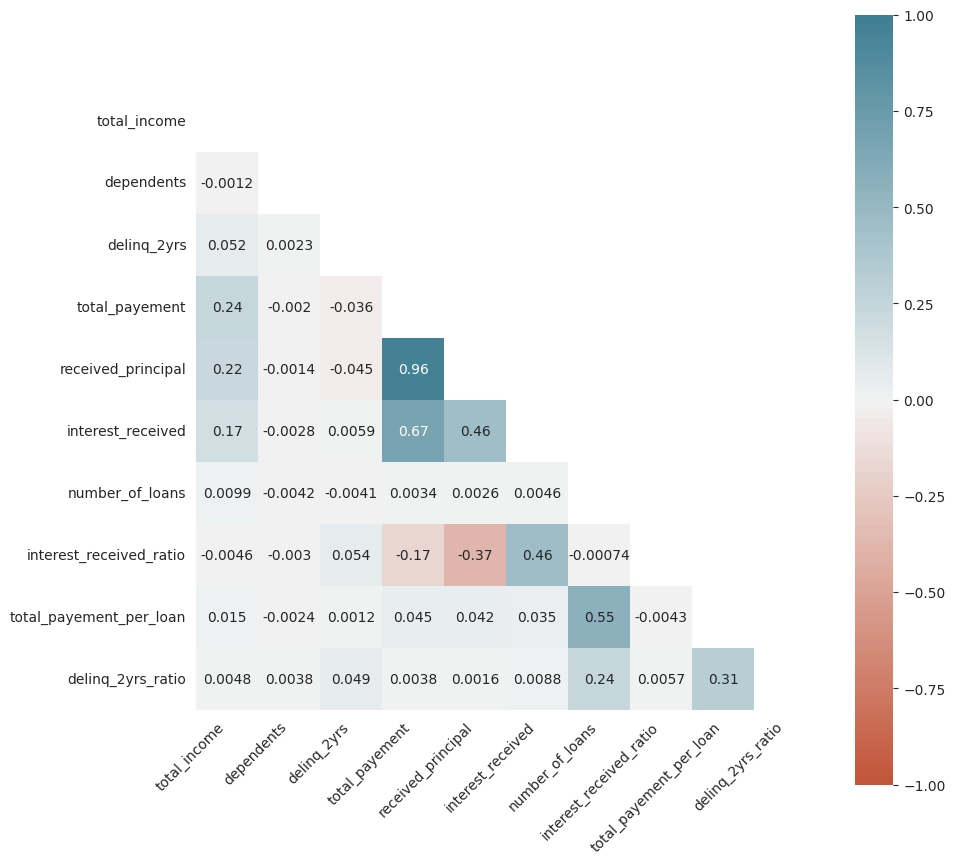

In [20]:
e.correlation_plot()


<br> - Le paiement total et le capital reçu sont fortement corrélés (0,96).
<br> - Les intérêts reçus et le paiement total sont moyennement corrélés (0,67).

### Box Plot vs Label

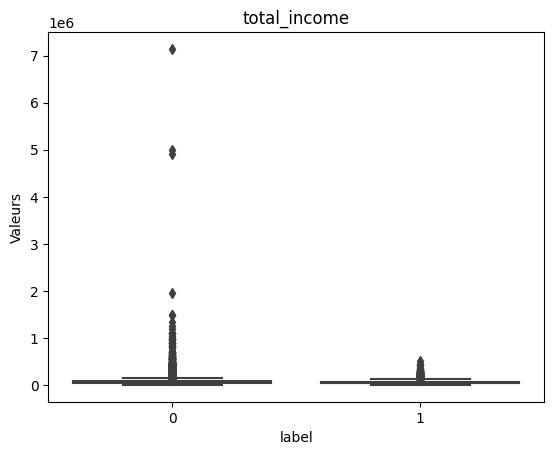

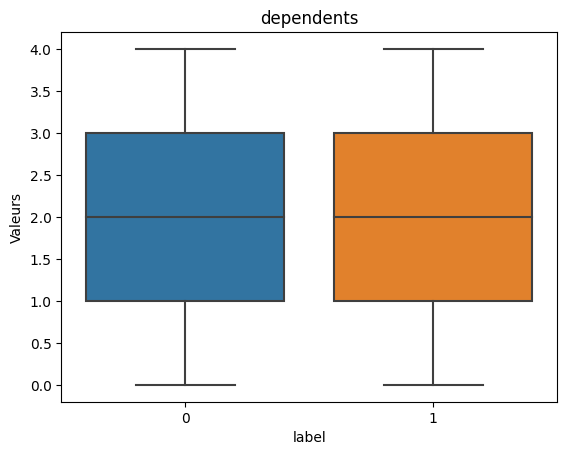

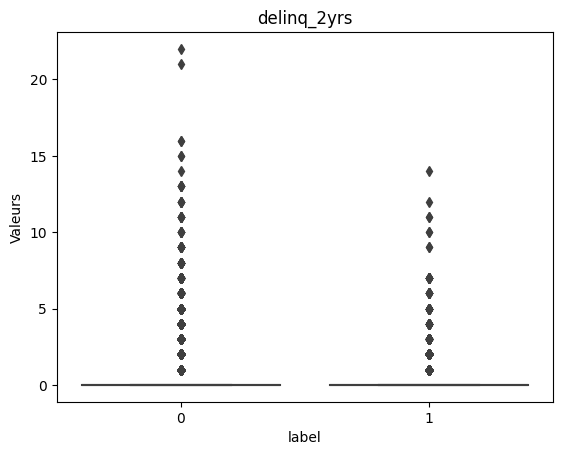

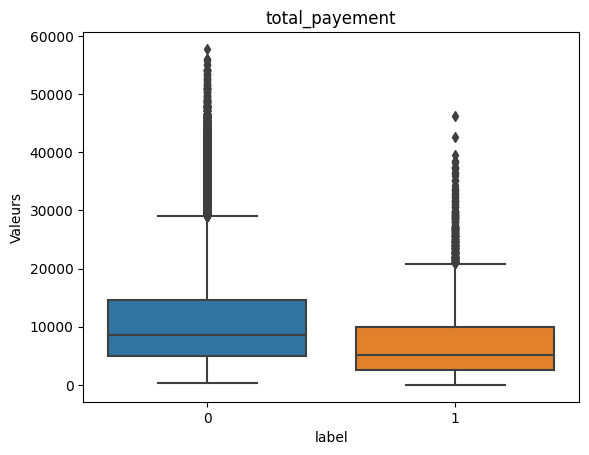

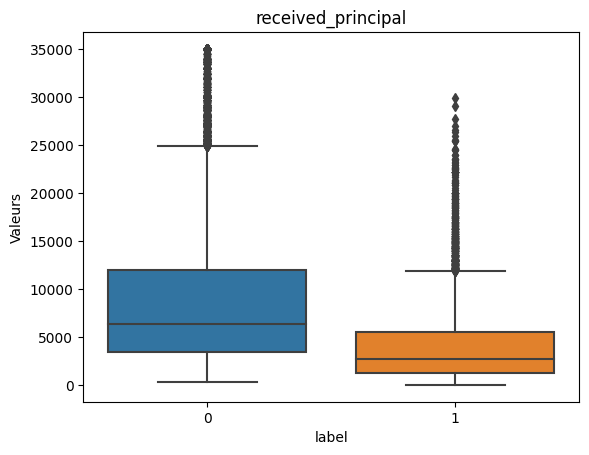

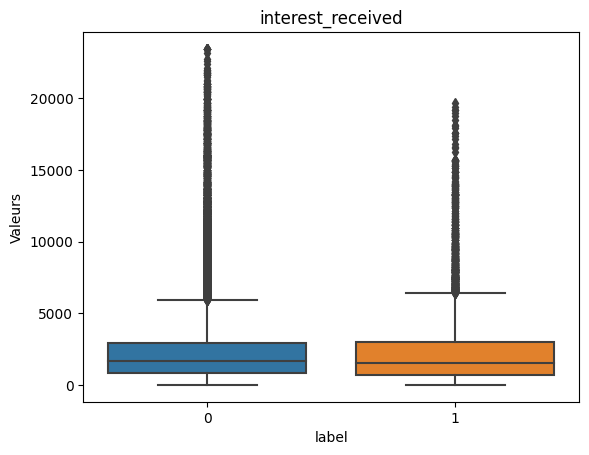

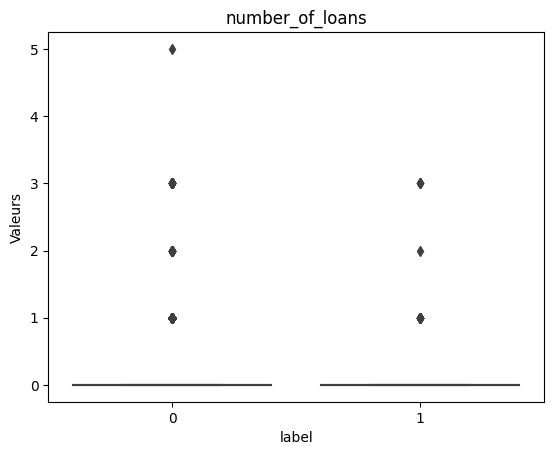

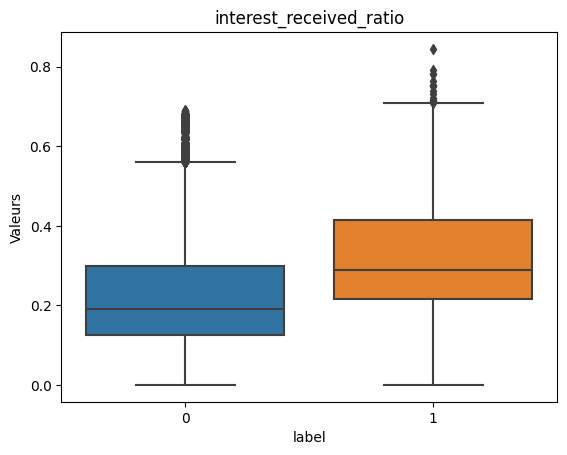

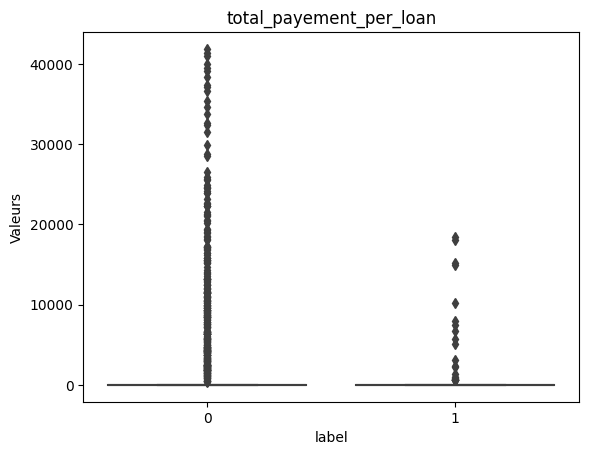

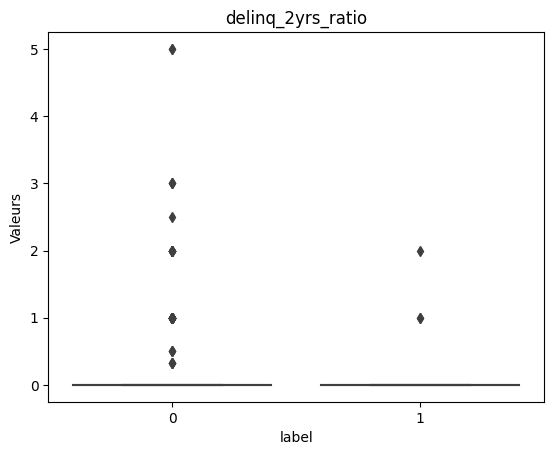

In [22]:
# Boxplot segmenté par défaut et non-défaut.
e.box_plot(groupe = ['label'])



<br>- La distribution du paiement total, du capital reçu et du ratio d'intérêts reçus est différente entre les emprunteurs en défaut et ceux qui ne sont pas en défaut.
<br>- Ces variables peuvent être des caractéristiques importantes pour la modélisation.

#  Transformation des variables catégorielles

In [8]:
cat_cols = train.drop(columns = id_cols).select_dtypes(include=['category', 'object']).columns
params = {"verbose":0,
          "cols":None,
          "drop_invariant":False,
          "return_df":True,
          "handle_missing":'value',
          "handle_unknown":'value',
          "min_samples_leaf":5000,
          "smoothing":1}
target_encoder = categorical_encoding(params)
target_encoder.fit(train, cat_cols, 'label')

In [9]:
train = target_encoder.transform(train)
val = target_encoder.transform(val)
hold_out = target_encoder.transform(hold_out)

# Feature Selection


## Random Forest

In [10]:
rf_params = {"n_estimators":250, 'criterion':'entropy','verbose':False, 'n_jobs':25}
rf_zero_imp = random_forest_zero_importance(train, id_cols, 'label', rf_params)

## Decision Tree

In [11]:
dt_params = {}
dt_zero_imp = decision_tree_zero_importance(train, id_cols, 'label', dt_params)

## Variables non significatives 

In [12]:
drop_cols = list(set(rf_zero_imp) & set(dt_zero_imp))
print(drop_cols)

['pincode']


le code postal (Pincode) a une importance nulle dans les modèles Random Forest et Decision Tree, nous supprimerons cette variable du modèle.

# Dévelopement de Modèle 
## Hyperparameter Tuning

In [15]:
result_ho = pd.DataFrame()
i = 0

## Définition de la fonction objectif
## Elle retournera le score à optimiser.

def objective(space):
    
    global i
    global result_ho
    
    #Création des données pour Lightgbm 
    lgb_train = lgb.Dataset(train.drop(columns = id_cols+drop_cols), label = train.label)
    lgb_val = lgb.Dataset(val.drop(columns = id_cols+drop_cols), label = val.label)

    #Paramètres de modèle
    params = {
        'num_leaves': int(space['num_leaves']),
        'max_depth': int(space['max_depth']),
        'learning_rate': space['learning_rate'],
        'objective': 'binary',
        'metric': 'auc',
        "boosting": "gbdt",
        'feature_fraction' : space['feature_fraction'],
        'max_bin' : int(space['max_bin']),
        'min_data_in_leaf': int(space['min_data_in_leaf']),
        "min_data_in_bin": int(space['min_data_in_bin']),
        "bagging_freq": 20,
        "random_seed": 2019,
        "lambda_l1": space['lambda_l1'],
        "lambda_l2": space['lambda_l2'],
        'pos_bagging_fraction' : space['pos_bagging_fraction'],
        'neg_bagging_fraction' : space['neg_bagging_fraction'],
        'verbose': -1
    }

    evals_result = {}
    
    clf = lgb.train(params, lgb_train, 20000, valid_sets=lgb_val,
                valid_names='val',
                early_stopping_rounds=50,
                verbose_eval=False, evals_result=evals_result)
    gc.collect()
    
    result = pd.DataFrame(clf.params, index=[0])
    
    ## Calcul d'AUC
    pred_train = clf.predict(train[clf.feature_name()])
    pred_val = clf.predict(val[clf.feature_name()])
    pred_hold_out = clf.predict(hold_out[clf.feature_name()])

    gc.collect()
    train_auc = roc_auc_score(train.label, pred_train)#, num_iteration=clf.best_iteration)
    val_auc = roc_auc_score(val.label, pred_val)#, num_iteration=clf.best_iteration)
    hold_out_auc = roc_auc_score(hold_out.label, pred_hold_out)#, num_iteration=clf.best_iteration)
    gc.collect()

    score = (abs(train_auc - val_auc) + 1)/((1+val_auc)*(1+val_auc))
    
    result["train_auc"] = train_auc
    result["val_auc"] = val_auc
    result["hold_out_auc"] = hold_out_auc
    result["train_test_diff"] = train_auc - val_auc
    result["n_estimators"] = clf.best_iteration
    result["score"] = score
    
    del clf
    
    result_ho = result_ho.append(result)
    result_ho.to_csv('hyperopt_results.csv', index=False)
    i = i+1
    
    return (score)

In [16]:
## L'espace  d'Hyperparameter

space = {
    'num_leaves': hp.quniform('num_leaves', 2, 24, 1), # Uniform integer between 2 and 24
    'max_depth': hp.quniform('max_depth', 2, 12, 1), # Uniform integer between 2 and 12
    'learning_rate': hp.uniform('learning_rate', 0.005, 0.015), # Values between 0.005 to 0.015
    'feature_fraction' : hp.uniform('feature_fraction', 0.1, 1), # Values between 0.1 to 1
    'max_bin' : hp.quniform('max_bin', 10, 100, 10),
    'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 25, 1000, 25),
    'lambda_l1' : hp.uniform('lambda_l1', 0, 50),
    'lambda_l2' : hp.uniform('lambda_l2', 0, 50),
    'min_data_in_bin' : hp.quniform('min_data_in_bin', 5, 100, 5),
    'pos_bagging_fraction' : hp.uniform('pos_bagging_fraction', 0.1, 1),
    'neg_bagging_fraction' : hp.uniform('neg_bagging_fraction', 0.1, 1)
    }

In [17]:
# Meilleures paramètes
best=fmin(fn = objective, 
          space = space, 
          algo = tpe.suggest,
          max_evals = 50,
          rstate = np.random.default_rng(7)
         )

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:47<00:00,  1.06trial/s, best loss: 0.25]


## La sélection de modèle

ON choisit les meilleurs hyperparamètres selon les critères suivants:
- Score élevé
- AUC de validation élevée
- Faible surapprentissage

In [13]:
hyperopt_results = pd.read_csv('hyperopt_results.csv')

In [10]:
hyperopt_results.head(5)

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,...,neg_bagging_fraction,verbose,num_iterations,early_stopping_round,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
0,18,3,0.009,binary,auc,gbdt,0.202,80,875,55,...,0.647,-1,20000,50,1.000,1.000,1.000,0.000,1,0.250
1,10,6,0.015,binary,auc,gbdt,0.238,10,225,65,...,0.468,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
2,9,8,0.009,binary,auc,gbdt,0.789,90,550,55,...,0.866,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
3,19,9,0.009,binary,auc,gbdt,0.475,70,100,60,...,0.894,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
4,6,12,0.007,binary,auc,gbdt,0.908,60,500,25,...,0.792,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250


In [14]:
hyperopt_results.sort_values(by = 'score').head(5)

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,...,neg_bagging_fraction,verbose,num_iterations,early_stopping_round,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
0,18,3,0.009,binary,auc,gbdt,0.202,80,875,55,...,0.647,-1,20000,50,1.000,1.000,1.000,0.000,1,0.250
26,17,3,0.013,binary,auc,gbdt,0.349,100,975,80,...,0.470,-1,20000,50,1.000,1.000,1.000,0.000,3,0.250
27,20,2,0.006,binary,auc,gbdt,0.425,80,825,100,...,0.991,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
28,13,8,0.009,binary,auc,gbdt,0.639,70,650,20,...,0.728,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
29,17,3,0.013,binary,auc,gbdt,0.368,90,1000,90,...,0.450,-1,20000,50,1.000,1.000,1.000,0.000,3,0.250


In [15]:
hyperopt_results.sort_values(by = 'val_auc', ascending=False).head(5)

,num_leaves,max_depth,learning_rate,objective,metric,boosting,feature_fraction,max_bin,min_data_in_leaf,min_data_in_bin,...,neg_bagging_fraction,verbose,num_iterations,early_stopping_round,train_auc,val_auc,hold_out_auc,train_test_diff,n_estimators,score
0,18,3,0.009,binary,auc,gbdt,0.202,80,875,55,...,0.647,-1,20000,50,1.000,1.000,1.000,0.000,1,0.250
1,10,6,0.015,binary,auc,gbdt,0.238,10,225,65,...,0.468,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
27,20,2,0.006,binary,auc,gbdt,0.425,80,825,100,...,0.991,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
28,13,8,0.009,binary,auc,gbdt,0.639,70,650,20,...,0.728,-1,20000,50,1.000,1.000,1.000,0.000,2,0.250
29,17,3,0.013,binary,auc,gbdt,0.368,90,1000,90,...,0.450,-1,20000,50,1.000,1.000,1.000,0.000,3,0.250


In [16]:
# Vérification de score minimum et sélection d'index comme meilleur hyperparamètre

best_param_index = hyperopt_results.index[hyperopt_results['score'] == hyperopt_results['score'].min()].tolist()[0]
lgbm_params = dict(hyperopt_results.iloc[best_param_index,:19])

## Modèle sélectionné

In [17]:
lgb_train = lgb.Dataset(train.drop(columns = id_cols+drop_cols), label = train['label'])
lgb_val = lgb.Dataset(val.drop(columns = id_cols+drop_cols), label = val['label'])
evals_result = {}
clf = lgb.train(lgbm_params, lgb_train, 20000, valid_sets=lgb_val,
                valid_names='val',
                early_stopping_rounds=50,
                verbose_eval=False, evals_result=evals_result)

# Evalution de modèle

In [18]:
pred_train = clf.predict(train[clf.feature_name()])
pred_val = clf.predict(val[clf.feature_name()])
pred_hold_out = clf.predict(hold_out[clf.feature_name()])

### ROC AUC, PR AUC, KS Stats

In [19]:
print("ROC AUC")
roc_auc([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out])
print("")
print("Class 1 PR AUC")
pr_auc([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out])
print("")
print("Class 0 PR AUC")
pr_auc([1-train.label,1-val.label,1-hold_out.label], [1-pred_train, 1-pred_val, 1-pred_hold_out])
print("")

ROC AUC
1.0
1.0
1.0

Class 1 PR AUC
1.0
1.0
1.0

Class 0 PR AUC
1.0
1.0
1.0



###  Distribution de Score

In [ ]:
score_distribution([train.label,val.label,hold_out.label], [pred_train, pred_val, pred_hold_out], ["Train","Val","Hold Out"])

## Feature Importance
### Split & Gain

In [ ]:
feature_importance = pd.DataFrame({"feature":clf.feature_name(),"split":clf.feature_importance('split'), "gain":clf.feature_importance('gain')}).sort_values(by = 'gain', ascending = False)
feature_importance.iloc[:10,:]

### SHAP

In [ ]:
import shap
data_list = [train,val,hold_out]
data_type_list = ['Training', 'Validation', 'Hold Out']
shap_importance(clf, data_list, data_type_list)

# Interprétation de la partition
## Courbe du Taux de Classement

Cette courbe indique deux informations importantes :

-Le taux de défaut selon différents intervalles de score pour l'entraînement, la validation et le jeu de test (Hold Out).

-La distribution des utilisateurs selon différents intervalles de score pour l'entraînement, la validation et le jeu de test (Hold Out).

In [ ]:
target_list = [train.label, val.label, hold_out.label]
pred_list = [pred_train, pred_val, pred_hold_out]
data_type_list = ['Train', 'Val', 'Hold Out']
class_rate(target_list, pred_list, data_type_list)

## Seuil

In [22]:
cutoff_score(val.label, pred_val, 0.01)

0.10072976013650585